In [229]:
import pandas as pd
import numpy as np
from pathlib import Path
import seaborn as sns
%matplotlib inline

In [230]:
whale_csv = Path('../../../Desktop/upenn-phi-virt-fin-pt-03-2021-u-c/03-Python-and-Pandas/Assignment/Starter_Code/Resources/whale_returns.csv')
algo_csv = Path('../../../Desktop/upenn-phi-virt-fin-pt-03-2021-u-c/03-Python-and-Pandas/Assignment/Starter_Code/Resources/algo_returns.csv')
sp500_csv = Path('../../../Desktop/upenn-phi-virt-fin-pt-03-2021-u-c/03-Python-and-Pandas/Assignment/Starter_Code/Resources/sp500_history.csv')

In [231]:
whale_df = pd.read_csv(whale_csv, parse_dates=True, index_col="Date", infer_datetime_format=True)
algo_df = pd.read_csv(algo_csv, parse_dates=True, index_col="Date", infer_datetime_format=True )
sp500_df = pd.read_csv(sp500_csv, parse_dates=True, index_col="Date", infer_datetime_format=True)
sp500_df = sp500_df.sort_values(by = "Date")
sp500_df.head()

,Close
Date,
2012-10-01,$1444.49
2012-10-02,$1445.75
2012-10-03,$1450.99
2012-10-04,$1461.40
2012-10-05,$1460.93


In [232]:
whale_df = whale_df.dropna()
print(whale_df.isnull().sum())
algo_df = algo_df.dropna()
print(algo_df.isnull().sum())
sp500_df = sp500_df.dropna()
print(sp500_df.isnull().sum())

SOROS FUND MANAGEMENT LLC      0
PAULSON & CO.INC.              0
TIGER GLOBAL MANAGEMENT LLC    0
BERKSHIRE HATHAWAY INC         0
dtype: int64
Algo 1    0
Algo 2    0
dtype: int64
Close    0
dtype: int64


In [239]:
sp500_df['Close'] = sp500_df['Close'].replace('$','').astype('float')
print(sp500_df)

ValueError: could not convert string to float: '$1444.49'

In [98]:
sp500_returns_df = sp500_df.pct_change()
sp500_returns_df = sp500_returns_df.rename(columns={'Close': "S&P 500"})

In [183]:
combined_portfolio = pd.concat([sp500_returns_df, whale_df,algo_df], axis = 'columns', join='inner')
print(combined_portfolio.head())

             S&P 500  SOROS FUND MANAGEMENT LLC  PAULSON & CO.INC.   \
Date                                                                  
2015-03-02  0.006125                        NaN                 NaN   
2015-03-03 -0.004539                  -0.001266           -0.004981   
2015-03-04 -0.004389                   0.002230            0.003241   
2015-03-05  0.001196                   0.004016            0.004076   
2015-03-06 -0.014174                  -0.007905           -0.003574   

            TIGER GLOBAL MANAGEMENT LLC  BERKSHIRE HATHAWAY INC    Algo 1  \
Date                                                                        
2015-03-02                          NaN                     NaN -0.008158   
2015-03-03                    -0.000496               -0.006569 -0.001942   
2015-03-04                    -0.002534                0.004213 -0.008589   
2015-03-05                     0.002355                0.006726 -0.000955   
2015-03-06                    -0.008481 

<AxesSubplot:title={'center':'Daily Returns'}, xlabel='Date'>

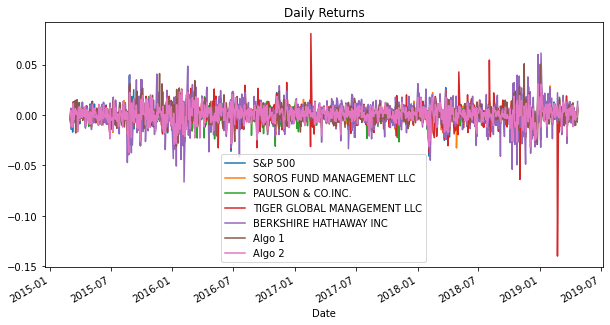

In [123]:
combined_portfolio.plot(title = "Daily Returns", figsize = (10,5))

<AxesSubplot:title={'center':'Cumulative Return'}, xlabel='Date'>

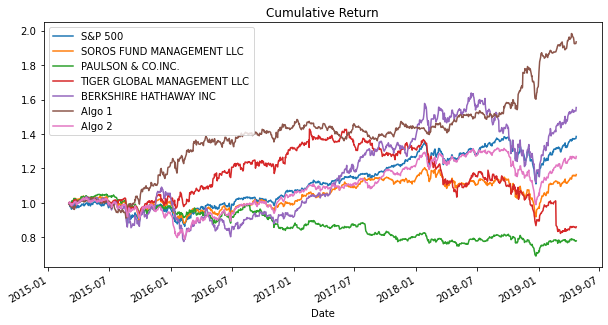

In [130]:
combined_portfolio_cumulative = (1 + combined_portfolio).cumprod()
combined_portfolio_cumulative.plot(figsize=(10,5), title = "Cumulative Return")

Algo 1 and Berkshire Hathaway both out perform the S&P500

<AxesSubplot:title={'center':'Box Plots'}>

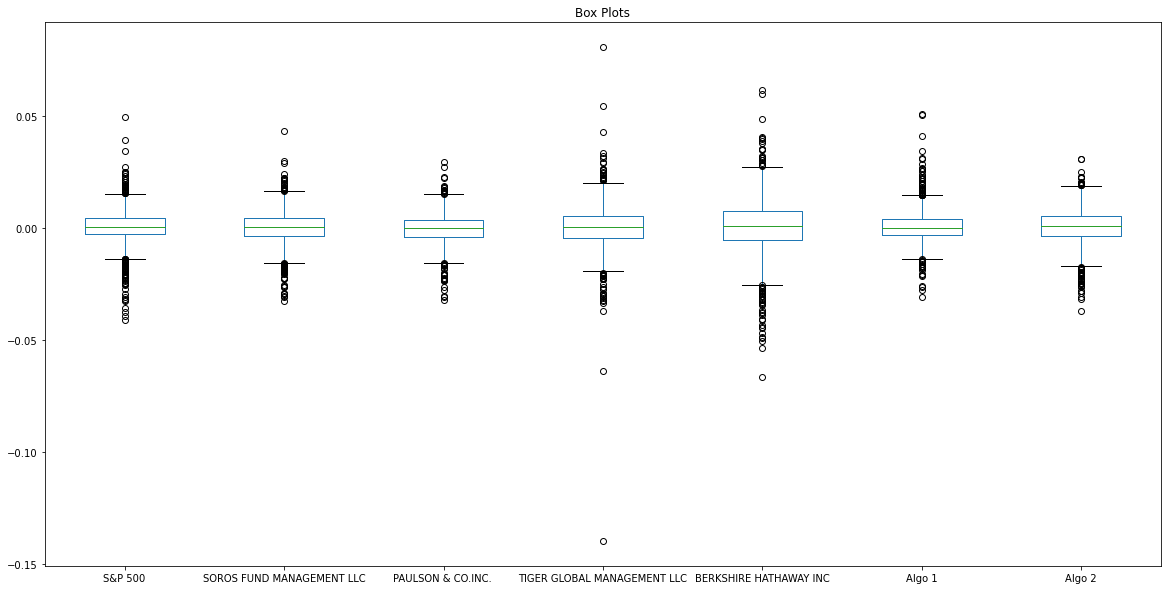

In [136]:
combined_portfolio.plot.box(title = 'Box Plots', figsize= (20,10))

In [144]:
portfolio_std = combined_portfolio.std().sort_values(ascending = True)
print(portfolio_std)

PAULSON & CO.INC.              0.007023
Algo 1                         0.007620
SOROS FUND MANAGEMENT LLC      0.007895
Algo 2                         0.008342
S&P 500                        0.008554
TIGER GLOBAL MANAGEMENT LLC    0.010894
BERKSHIRE HATHAWAY INC         0.012919
dtype: float64


Tiger Global and Berkshire Hathaway are both riskier than the S&P 500

In [152]:
annualized_std = portfolio_std*np.sqrt(252)

In [160]:
print(annualized_std.sort_values(ascending = True))

PAULSON & CO.INC.              0.111488
Algo 1                         0.120967
SOROS FUND MANAGEMENT LLC      0.125335
Algo 2                         0.132430
S&P 500                        0.135786
TIGER GLOBAL MANAGEMENT LLC    0.172936
BERKSHIRE HATHAWAY INC         0.205077
dtype: float64


In [149]:
combined_portfolio_rolling_std = combined_portfolio.rolling(window = 21).std()

<AxesSubplot:title={'center':' 21 Day Rolling STD'}, xlabel='Date'>

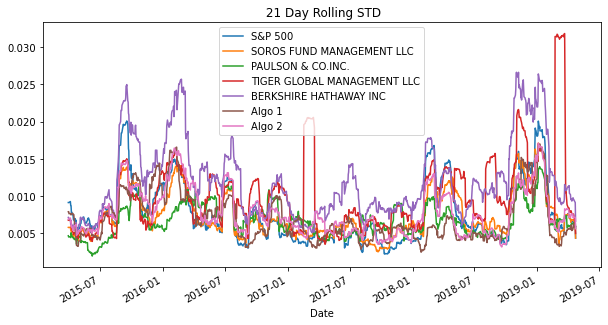

In [162]:
combined_portfolio_rolling_std.plot(figsize = (10,5), title= ' 21 Day Rolling STD')

In [247]:
combined_portfolio_corr = combined_portfolio.corr()

<AxesSubplot:>

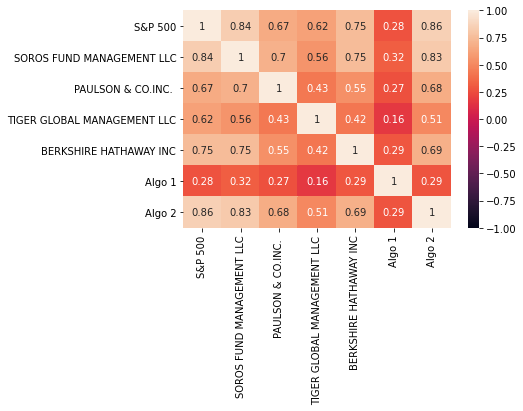

In [249]:
sns.heatmap(combined_portfolio_corr, vmin = -1, vmax = 1, annot = True)

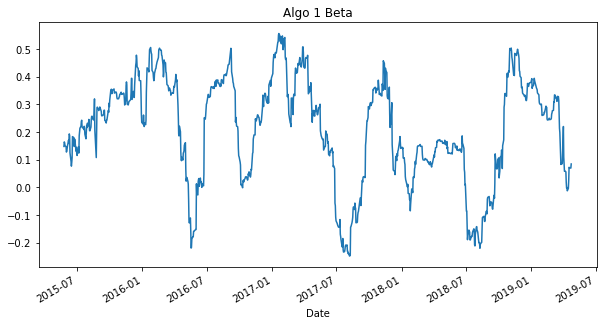

In [195]:
algo_1_covariance = combined_portfolio['Algo 1'].rolling(window = 60).cov(combined_portfolio['S&P 500'])
variance = combined_portfolio['S&P 500'].rolling(window = 60).var()
algo_1_beta = algo_1_covariance / variance
algo_1_beta_plot = algo_1_beta.plot(figsize = (10,5), title = 'Algo 1 Beta')

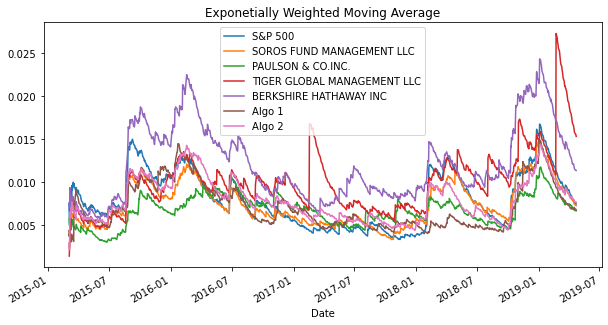

In [197]:
ewm = combined_portfolio.ewm(halflife = 21, adjust = True).std().plot(title = "Exponetially Weighted Moving Average", figsize = (10,5))

In [200]:
sharpe_ratio = (combined_portfolio.mean()*252)/ (combined_portfolio.std()* np.sqrt(252))
print(sharpe_ratio)

S&P 500                        0.658706
SOROS FUND MANAGEMENT LLC      0.356417
PAULSON & CO.INC.             -0.483570
TIGER GLOBAL MANAGEMENT LLC   -0.121060
BERKSHIRE HATHAWAY INC         0.621810
Algo 1                         1.360829
Algo 2                         0.506929
dtype: float64


<AxesSubplot:title={'center':'Sharpe Ratios'}>

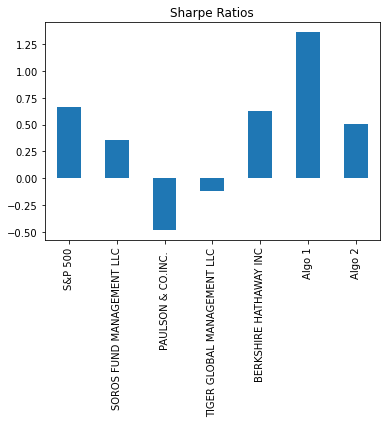

In [201]:
sharpe_ratio.plot(kind ='bar', title = 'Sharpe Ratios')

Algo 1 easily outperforms the S&P 500 and Whale Portfolios. Algo 2 only outperforms 3 of the Whale Portfolios but fails to out perform the S&P 500.

In [209]:
penn_csv = Path('PENN.csv')
tsla_csv = Path('TSLA.csv')
gme_csv = Path('GME.csv')

In [210]:
penn_df = pd.read_csv(penn_csv,parse_dates=True, index_col="Date", infer_datetime_format=True)
tsla_df = pd.read_csv(tsla_csv, parse_dates=True, index_col="Date", infer_datetime_format=True)
gme_df = pd.read_csv(gme_csv, parse_dates=True, index_col="Date", infer_datetime_format=True)

In [221]:
penn_df = penn_df.rename(columns = {'Close' : 'Penn'})
tsla_df = tsla_df.rename(columns = {'Close' : 'TSLA'})
gme_df = gme_df.rename(columns = {'Close' : 'GME'})

In [253]:
combined_stocks = pd.concat([penn_df, tsla_df, gme_df], axis = 1, join = 'inner')
combined_stocks.sort_index(inplace = True)
combined_stocks.head()

,Penn,TSLA,GME
Date,,,
2019-01-04 16:00:00,21.18,63.54,15.24
2019-01-11 16:00:00,24.86,69.45,15.85
2019-01-18 16:00:00,24.60,60.45,15.93
2019-01-25 16:00:00,24.19,59.41,15.90
2019-02-01 16:00:00,24.84,62.44,11.24


In [227]:
combined_stocks = combined_stocks.dropna()

In [257]:
combined_stocks.index = combined_stocks.index.date

In [258]:
combined_stocks

,Penn,TSLA,GME
2019-01-04,21.18,63.54,15.24
2019-01-11,24.86,69.45,15.85
2019-01-18,24.60,60.45,15.93
2019-01-25,24.19,59.41,15.90
2019-02-01,24.84,62.44,11.24
...,...,...,...
2020-12-04,70.77,599.04,16.90
2020-12-11,74.42,609.99,13.31
2020-12-18,91.94,695.00,15.63
2020-12-24,94.66,661.77,20.15
